In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

Giải thích

In [2]:
data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## 1 Xác định các thuộc tính
output: SalePrice
input: <> SalePrice


In [6]:
numbers = [f for f in data.columns if data.dtypes[f] != 'object']  # Quantitative
lst_num = ','.join(numbers)
lst_num

'Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice'

In [7]:
object = [f for f in data.columns if data.dtypes[f] == 'object']  # Quanlitative
lst_object = ','.join(object)
lst_object

'MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition'

In [8]:
# Categorical
i = 1
for obj in object:
    print(i,"/", obj, "\t", len(data[obj].unique()), ":", data[obj].unique())
    i = i+1

1 / MSZoning 	 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 / Street 	 2 : ['Pave' 'Grvl']
3 / Alley 	 3 : [nan 'Grvl' 'Pave']
4 / LotShape 	 4 : ['Reg' 'IR1' 'IR2' 'IR3']
5 / LandContour 	 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
6 / Utilities 	 2 : ['AllPub' 'NoSeWa']
7 / LotConfig 	 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 / LandSlope 	 3 : ['Gtl' 'Mod' 'Sev']
9 / Neighborhood 	 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 / Condition1 	 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 / Condition2 	 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 / BldgType 	 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
13 / HouseStyle 	 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
14 / RoofStyle 	 6 : ['Gable' 'Hip' 'Gambrel

In [9]:
# Catagorical & Continueous
i = 1
for obj in numbers:
    print(i,"/","\t",len(data[obj].unique()),":",data[obj].unique() if len(data[obj].unique()) < 150 else '' )
    i=i+1

1 / 	 1460 : 
2 / 	 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
3 / 	 111 : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
4 / 	 1073 : 
5 / 	 10 : [ 7  6  8  5  9  4 10  3  1  2]
6 / 	 9 : [5 8 6 7 4 2 3 9 1]
7 / 	 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956

In [10]:
# Phân tích dữ liệu hai biến

In [11]:
features = data[['LotArea', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]
features

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5


In [12]:
i = 1
for obj in features:
    print(i,"/","\t",len(data[obj].unique()), ":", data[obj].unique() if len(data[obj].unique()) < 150 else '')
    i+=1

1 / 	 1073 : 
2 / 	 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
3 / 	 753 : 
4 / 	 417 : 
5 / 	 4 : [2 1 3 0]
6 / 	 8 : [3 4 1 2 0 5 6 8]
7 / 	 12 : [ 8  6  7  9  5 11  4 10 12  3  2 14]


In [13]:
data['LotArea'].mean() 

10516.828082191782

In [14]:
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [15]:
# Range
range = np.ptp(data['LotArea'])
range

213945

In [16]:
# Skewnis
skew = data['LotArea'].skew() # skew > 0 ->>> lệch phải
skew

12.207687851233496

In [17]:
scipy.stats.skew(data['LotArea'])

12.195142125084478

In [18]:
kuritous = data['LotArea'].kurtosis() # -> Kurtosis > 0 -> biểu đồ phân phối nhọn hơn so với phân phối chuẩn
kuritous

203.24327101886033

In [19]:
scipy.stats.kurtosis(data['LotArea'])

202.5437927513529

In [20]:
Q1 = data['LotArea'].quantile(0.25)
Q3 = data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
IQR

4048.0

In [21]:
IQR_2 = scipy.stats.iqr(data['LotArea'])
IQR_2

4048.0

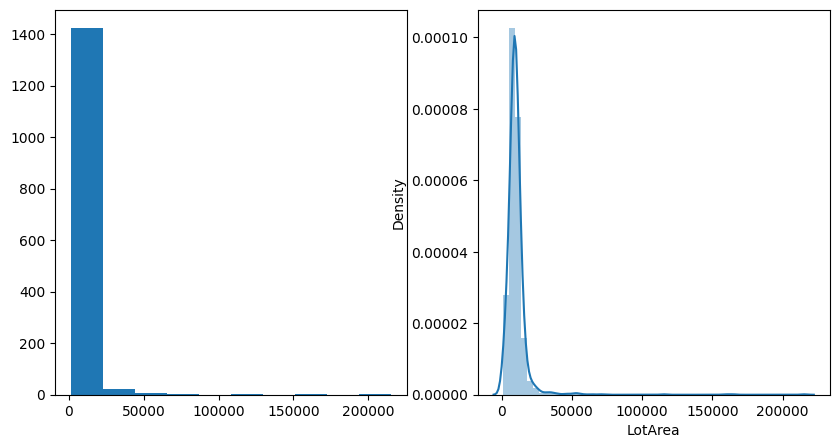

In [22]:
# Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(data['LotArea'])
plt.subplot(1,2,2)
sns.distplot(data['LotArea'])
plt.show()

<AxesSubplot: >

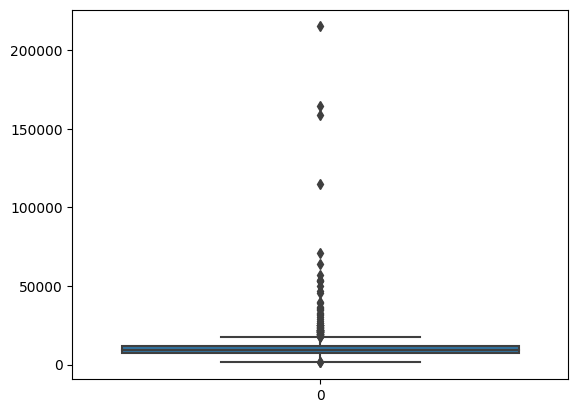

In [23]:
sns.boxplot(data['LotArea'])

In [24]:
# Number of upper outlier
n_up_out  = data[data['LotArea']>Q3+1.5*IQR].shape[0]
n_up_out

67

In [25]:
# Number of lower outlier
n_low_out  = data[data['LotArea']< Q1- 1.5*IQR].shape[0]
n_low_out

2

In [26]:
data.shape[0]

1460

In [27]:
# Xem xét có loại bỏ outlier hay không

In [28]:
# Percentage of outlier
percent_out = (n_up_out+n_low_out)/data.shape[0]
percent_out

0.04726027397260274

In [29]:
# Biến Categorical Variables
data[['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]

,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,2,3,8
1,2,3,6
2,2,3,6
3,1,3,7
4,2,4,9
...,...,...,...
1455,2,3,7
1456,2,3,7
1457,2,4,9
1458,1,2,5


In [30]:
# FullBath
data['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [31]:
# FullBath
FullBath_Count = data.groupby('FullBath').count()['Id']

<AxesSubplot: xlabel='FullBath'>

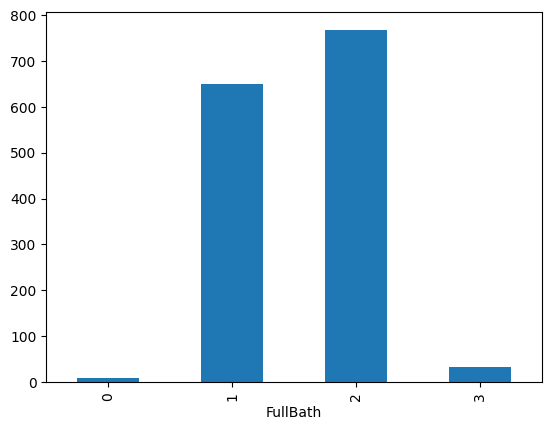

In [32]:
FullBath_Count.plot.bar()

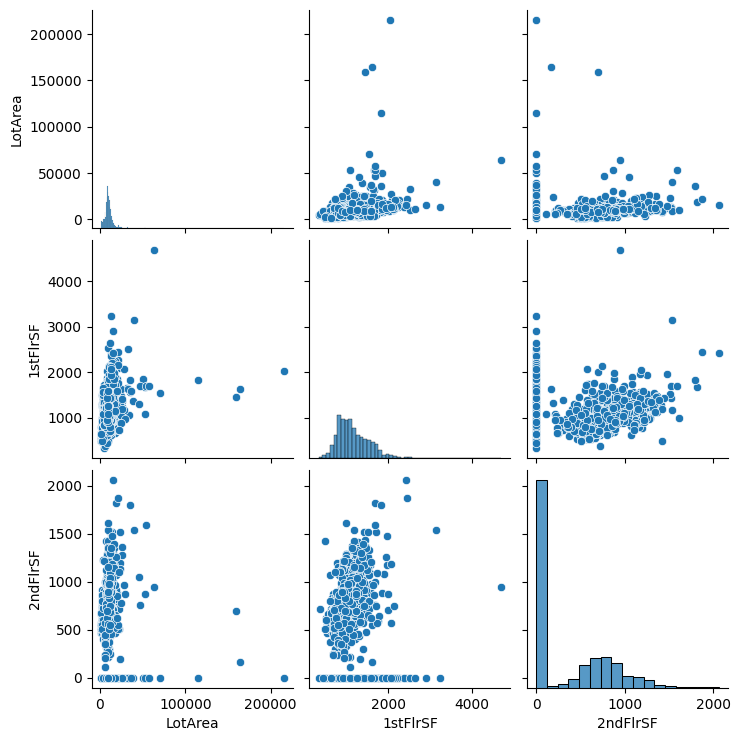

In [33]:
# Continuos & Continues
sns.pairplot(data[['LotArea', '1stFlrSF','2ndFlrSF']])

In [34]:
data[['LotArea', '1stFlrSF','2ndFlrSF']].corr()

,LotArea,1stFlrSF,2ndFlrSF
LotArea,1.000000,0.299475,0.050986
1stFlrSF,0.299475,1.000000,-0.202646
2ndFlrSF,0.050986,-0.202646,1.000000


In [35]:
# Categorical & Categorical 
# 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
# Contigency Table Ho: 'FullBath' and 'BedroomAbvGr' independent
table_FB = pd.crosstab(data['FullBath'],data['BedroomAbvGr'])
table_FB

BedroomAbvGr,0,1,2,3,4,5,6,8
FullBath,,,,,,,,
0,5,2,2,0,0,0,0,0
1,1,42,213,352,37,5,0,0
2,0,6,143,443,156,12,7,1
3,0,0,0,9,20,4,0,0


<AxesSubplot: xlabel='FullBath'>

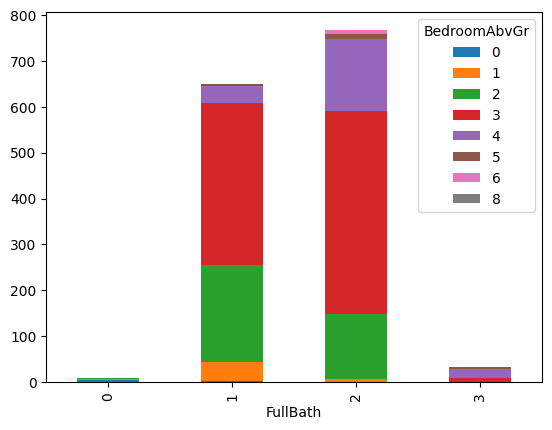

In [36]:
table_FB.plot(kind='bar',stacked=True)

In [37]:
# Chi-quare 
from scipy.stats import chi2_contingency, chi2

In [38]:
statistics, p, dof, expect = chi2_contingency(table_FB)

In [39]:
p

9.022959522651409e-177

In [40]:
# So sánh p-value với alpha
prob = 0.95
alpha = 1 - prob
if p < alpha:
    print('Dependent (reject Ho)')
else:
    print('Independent (fail to reject Ho)')

Dependent (reject Ho)


In [41]:
# So sánh statistics với critical value
critical = chi2.ppf(prob,dof)
print(critical)
print(statistics)

32.670573340917315
898.9300586036229


In [42]:
if abs(statistics) > critical:
    print('Depentdent (reject H0)')
else:
    print('Indepentdent (fail to reject H0)')

Depentdent (reject H0)


In [43]:
#Category & Continuous 	
# 'FullBath' có bị ảnh hưởng bởi LotArea hay không?
table_FL = pd.crosstab(data['FullBath'],data['LotArea'])
table_FL

LotArea,1300,1477,1491,1526,1533,1596,1680,1869,1890,1920,...,53107,53227,53504,57200,63887,70761,115149,159000,164660,215245
FullBath,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,2,1,8,1,2,1,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,2,0,0,0,...,1,0,0,0,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
data_sub = data[['FullBath','LotArea']]
data_sub

,FullBath,LotArea
0,2,8450
1,2,9600
2,2,11250
3,1,9550
4,2,14260
...,...,...
1455,2,7917
1456,2,13175
1457,2,9042
1458,1,9717


<AxesSubplot: xlabel='FullBath', ylabel='LotArea'>

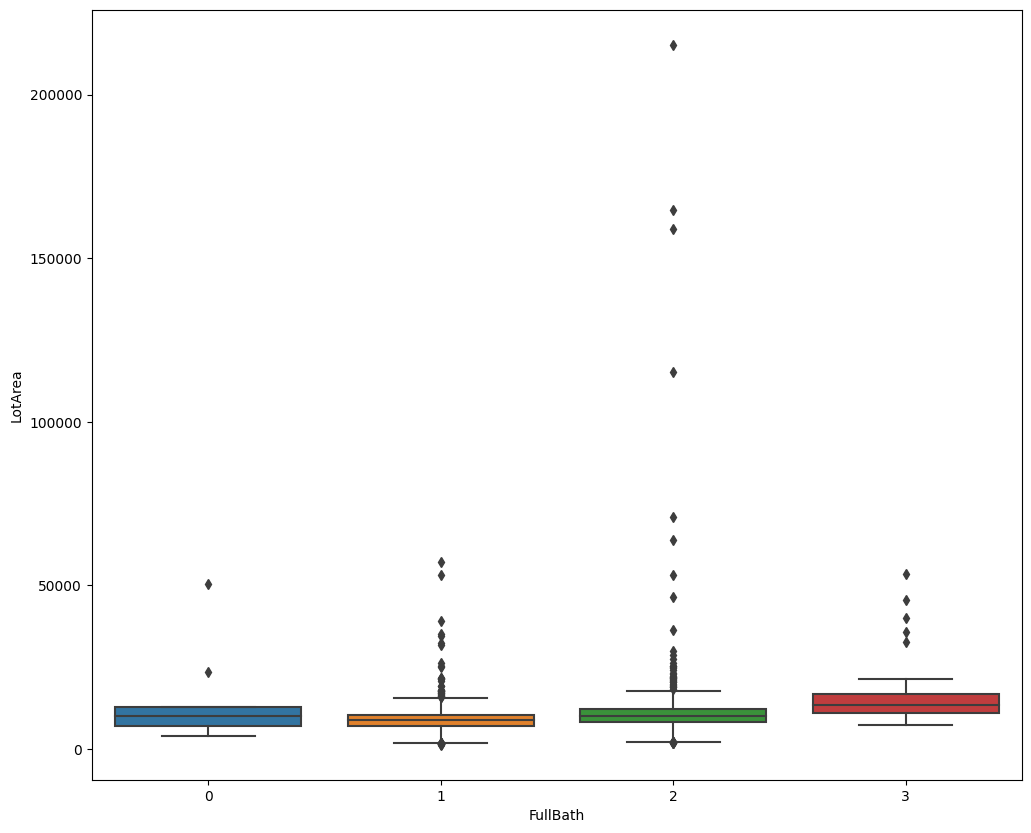

In [45]:
plt.figure(figsize=(12,10))
sns.boxplot(x='FullBath', y='LotArea',data=data_sub)

In [46]:
import statsmodels.api as sm
from  statsmodels.formula.api import ols

In [47]:
models = ols('LotArea ~ C(FullBath)',data= data_sub).fit()
anova_table = sm.stats.anova_lm(models,type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(FullBath),3.0,3.332090e+09,1.110697e+09,11.386809,2.207543e-07
Residual,1456.0,1.420217e+11,9.754240e+07,NaN,NaN


In [48]:
# Giải thích P-Value thu được từ phân tích anova cho LotArea và FullBath phối hợp có ý nghĩa thống kê (p<0.05)
# Kết luận: LotArea ảnh hưởng đáng kể đên FullBath

In [49]:
# Chi tiết hơn
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=data['LotArea'],groups=data['FullBath'],alpha=0.05)
print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
     0      1 -5695.6583 0.3145 -14221.4079  2830.0913  False
     0      2 -3587.0109 0.6999 -12103.8107   4929.789  False
     0      3  2477.0404 0.9095  -7075.3974 12029.4782  False
     1      2  2108.6474 0.0004    754.8034  3462.4914   True
     1      3  8172.6987    0.0   3639.9202 12705.4772   True
     2      3  6064.0513 0.0032   1548.1288 10579.9737   True
-------------------------------------------------------------


In [50]:
# Giải thích Các kết quả trên từ Tukey HSD cho thấy 0-1, 0-2, 0-3 chấp nhận Ho, các so sánh cặp khác về số phòng bác bỏ H0 và chỉ ra sự khác biệt đáng kể về mặt thống kê.